# Antes de empezar:

    Lee el archivo README.md
    Comenta todo lo que puedas y utiliza los recursos (archivo README.md)
    ¡Feliz aprendizaje!

En este ejercicio, generaremos números aleatorios a partir de las disribuciones continuas que aprendimos en la lección. Hay dos formas de generar números aleatorios:

1. Usando la librería numpy 
1. Usando la librería Scipy 

Utiliza cualquiera de las dos librerías o ambas en este ejercicio.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

/home/ubuntu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Distribución Uniforme

Para generar números aleatorios uniformes entre dos valores dados usando scipy, podemos usar el siguiente código o el código que hemos
discutido en clase:

(array([112.,  83., 112., 110., 101.,  99.,  97.,  85.,  91., 110.]),
 array([10.00409438, 14.99827697, 19.99245956, 24.98664216, 29.98082475,
        34.97500734, 39.96918993, 44.96337252, 49.95755512, 54.95173771,
        59.9459203 ]),
 <BarContainer object of 10 artists>)

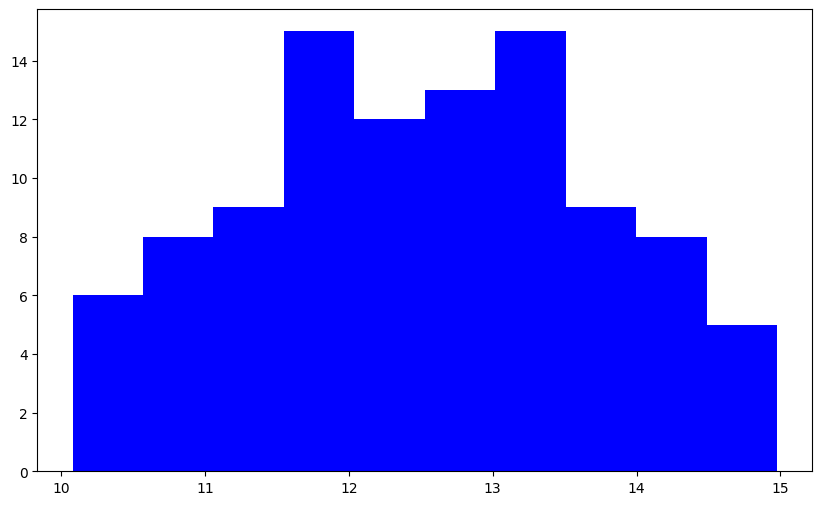

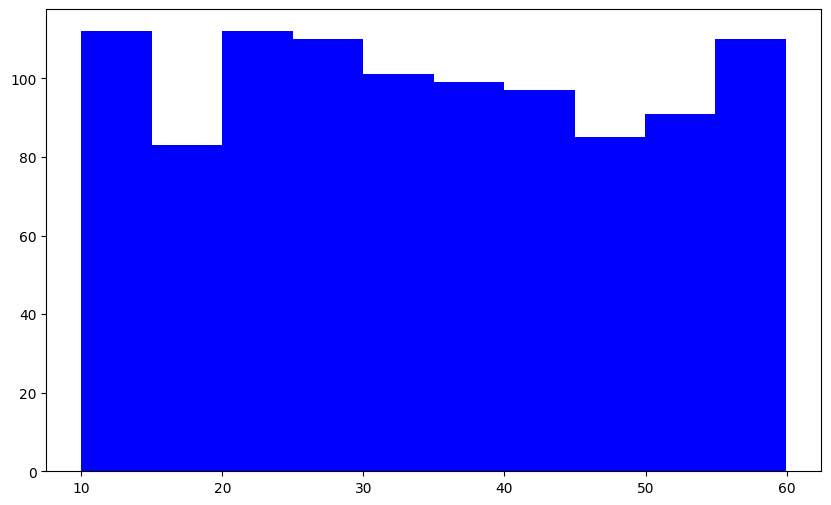

In [12]:
def uniform_numbers (bottom, ceiling, count):
    return np.random.uniform(low=bottom, high=ceiling, size=(count))

np.random.seed(123)
hist1 = uniform_numbers(10,15,100)
hist2 = uniform_numbers(10,60,1000)


plt.figure(figsize=(10,6))
plt.hist(x=hist1, bins=10, color='Blue')

plt.figure(figsize=(10,6))
plt.hist(x=hist2, bins=10, color='Blue')


**Tarea:**

1. Basándote en el código anterior, escribe una función que genere números aleatorios uniformemente distribuidos. Hay varios requisitos para tu función:
    * Debe aceptar 3 parámetros: 
        * `bottom` - el límite inferior de los números generados
        * `ceiling` - el límite superior de los números generados
        * `count` - cuántos números generar
    * Debe devolver una matriz de números aleatorios distribuidos uniformemente

2. Llama a tu función con 2 conjuntos de parámetros a continuación:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

3. Traza las distribuciones uniformes generadas anteriormente utilizando histogramas, donde el eje x es el valor y el eje y es el recuento. Que el número de intervalos del histograma sea 10.

El resultado debe ser como el siguiente:

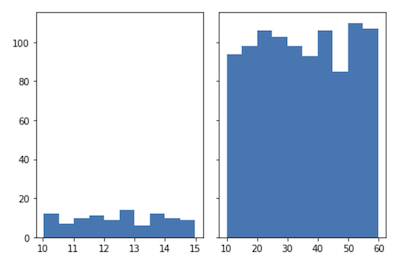

How are the two distributions different?

Graph 1 is narrower, Graph 2 is wider

Graph 1 has some peaks around central numbers

Graph 2 is widespread making it more uniform

## Distribución Normal

1. De la misma manera en el reto de Distribución Uniforme, escriba una función que genere números aleatorios distribuidos normalmente.
1. Genera 1.000 números distribuidos normalmente con media de 10 y desviación típica de 1
1. Genera 1.000 números distribuidos normalmente con una media de 10 y una desviación típica de 50
2. Representa gráficamente las distribuciones de los datos generados.

Resultado esperado:

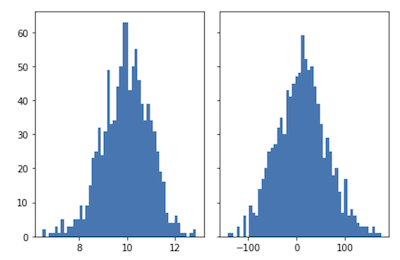

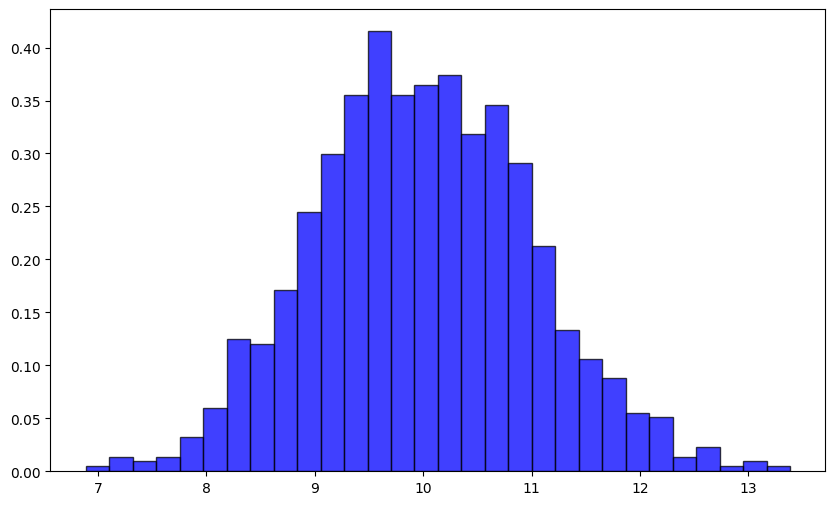

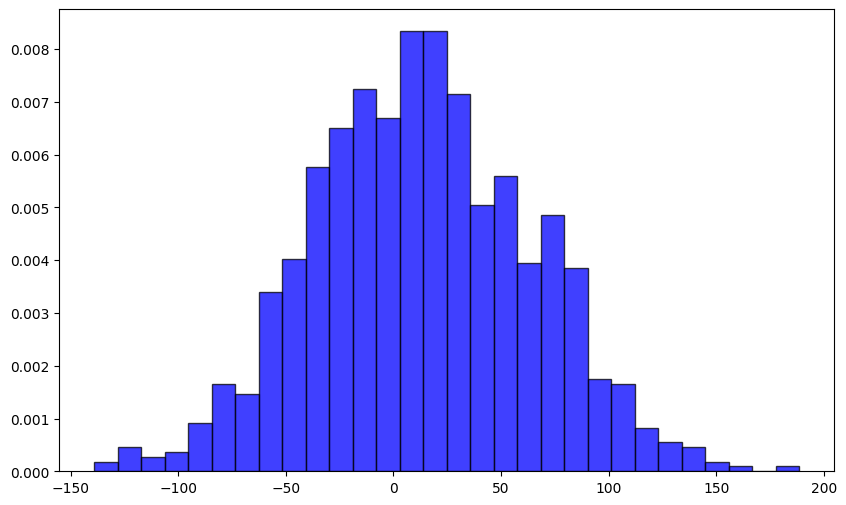

In [17]:
from scipy.stats import norm 

def generate_normal_scipy (mean_, std_, size_scipy):
    return(norm.rvs(loc=mean_, scale=std_,size=size_scipy))


normal_scipy1 = generate_normal_scipy (10,1,1000)
normal_scipy2 = generate_normal_scipy(10,50,1000)

plt.figure(figsize=(10, 6))
plt.hist(normal_scipy1, bins=30, density=True, alpha=0.75, color='blue', edgecolor='black')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(normal_scipy2, bins=30, density=True, alpha=0.75, color='blue', edgecolor='black')
plt.show()

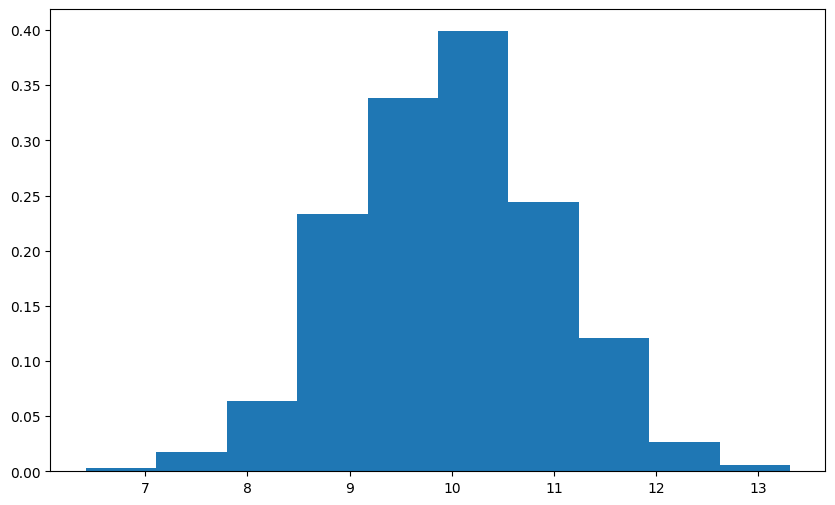

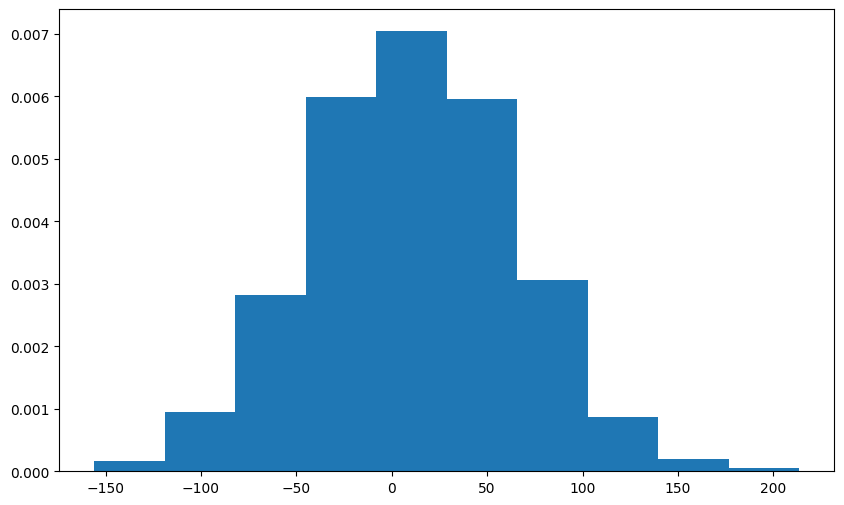

In [16]:
def generate_normal (media, std_dev,size_):
    return(np.random.normal(media,std_dev, size=size_))

Normal_1 = generate_normal(10,1,1000)
Normal_2 = generate_normal(10,50,1000)

plt.figure(figsize=(10,6))
plt.hist(x=Normal_1, bins=10, density=True)
plt.show()

plt.figure(figsize=(10,6))
plt.hist(x=Normal_2, bins=10, density=True)
plt.show()

How are the two distributions different?

Graph 1 is narrower, Graph 2 is wider because of different STD.DEV(1 vs 50)

## Distribución Normal de Datos Reales

En este reto vamos a echar un vistazo a los datos reales. Utilizaremos el archivo vehicles.csv para este ejercicio

In [49]:
import scipy
df = pd.read_csv('/home/ubuntu/Ironhack_all/Ironhack_20th_ProbabilityDistributions/your-code/vehicles.csv')
print(df.columns)

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')


In [24]:
df.head(1)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950


Primero importa vehicles.csv.
A continuación, traza los histogramas de las siguientes variables:

1. Barriles de combustible/año

In [28]:
df.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


0.06
47.08714285714285
4.467282686296915
17.609055502328133


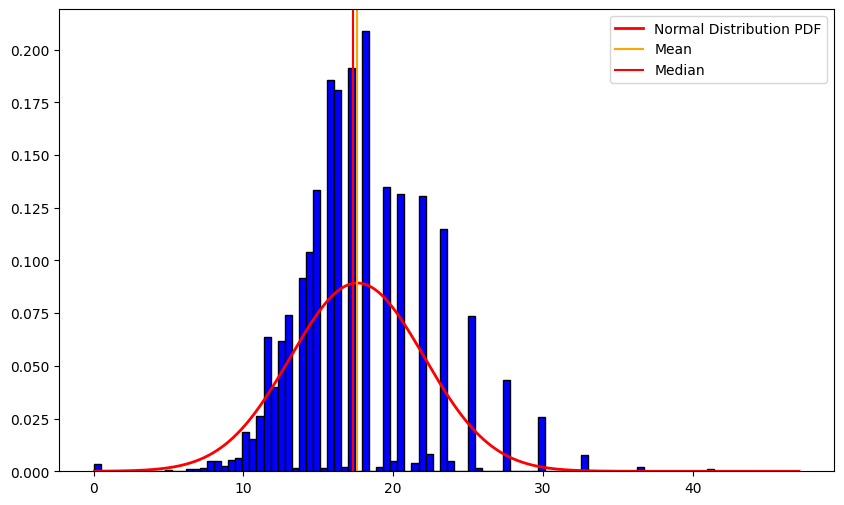

In [89]:
print(df['Fuel Barrels/Year'].min())
print(df['Fuel Barrels/Year'].max())
print(df['Fuel Barrels/Year'].std())
print(df['Fuel Barrels/Year'].mean())

x_values_barrels = np.linspace(df['Fuel Barrels/Year'].min(), df['Fuel Barrels/Year'].max(), 1000)
pdf_values_barrels = norm.pdf(x_values_barrels,df['Fuel Barrels/Year'].mean(), df['Fuel Barrels/Year'].std())

plt.figure(figsize=(10,6))
plt.plot(x_values_barrels, pdf_values_barrels, 'r-', lw=2, label='Normal Distribution PDF')
plt.hist(x=df['Fuel Barrels/Year'], bins=100, color='Blue',edgecolor='Black', density=True)
plt.axvline(df['Fuel Barrels/Year'].mean(), label=f'Mean', color='Orange')
plt.axvline(np.median(df['Fuel Barrels/Year']), label='Median', color='Red')
plt.legend()
plt.show()

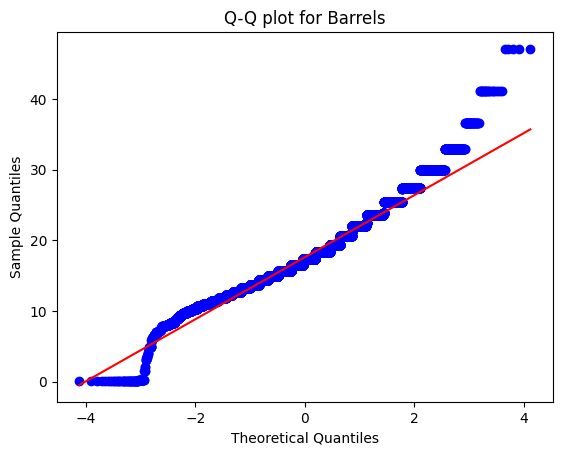

In [88]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


# Extract the column you want to assess
data = df['Fuel Barrels/Year']

# Generate Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot for Barrels')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


2. Emisiones de CO2 Gramos/Milla 

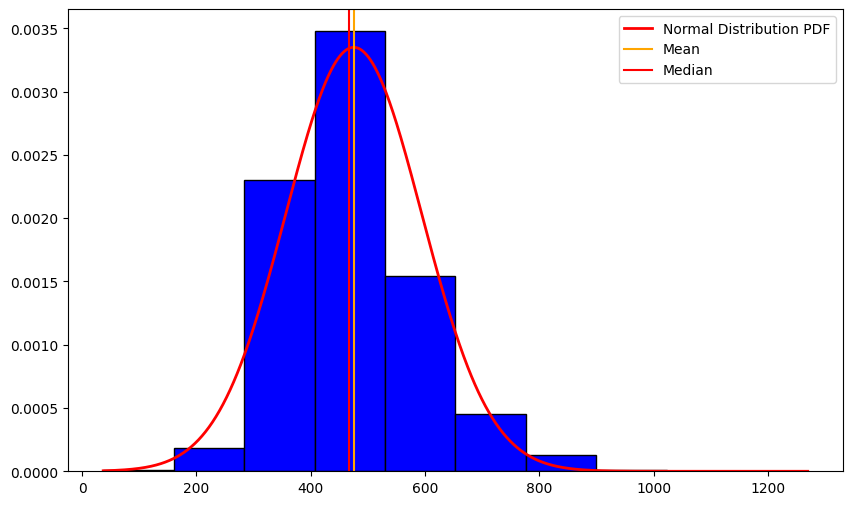

In [78]:
CO2_Emissions = np.linspace(df['CO2 Emission Grams/Mile'].min(), df['CO2 Emission Grams/Mile'].max(), 1000)
pdf_values_CO2Emissions = norm.pdf(CO2_Emissions,df['CO2 Emission Grams/Mile'].mean(), df['CO2 Emission Grams/Mile'].std())


plt.figure(figsize=(10,6))

plt.hist(x=df['CO2 Emission Grams/Mile'], bins=10, color='Blue',edgecolor='Black', density=True)
plt.plot(CO2_Emissions, pdf_values_CO2Emissions, 'r-', lw=2, label='Normal Distribution PDF')
plt.axvline(df['CO2 Emission Grams/Mile'].mean(), label=f'Mean', color='Orange')
plt.axvline(np.median(df['CO2 Emission Grams/Mile']), label='Median', color='Red')
plt.legend()
plt.show()

3. MPG combinado

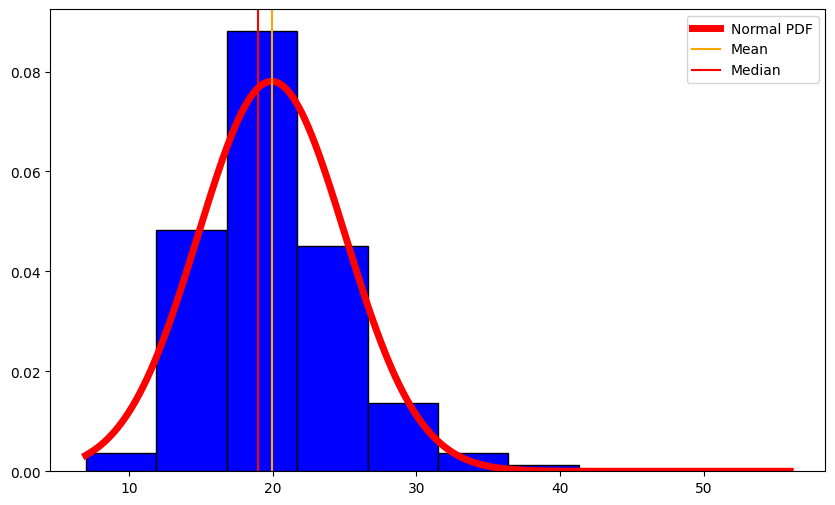

In [82]:
x_values_MPG = np.linspace(df['Combined MPG'].min(), df['Combined MPG'].max(), 1000)
pdf_MPG = norm.pdf(x_values_MPG, df['Combined MPG'].mean(), df['Combined MPG'].std())

plt.figure(figsize=(10,6))
plt.plot(x_values_MPG, pdf_MPG, 'r-', lw=5, label = 'Normal PDF')
plt.hist(x=df['Combined MPG'], bins=10, color='Blue',edgecolor='Black', density=True)
plt.axvline(df['Combined MPG'].mean(), label=f'Mean', color='Orange')
plt.axvline(np.median(df['Combined MPG']), label='Median', color='Red')
plt.legend()
plt.show()

¿Cuál o cuáles de las variables tienen una distribución casi normal? ¿Cómo lo sabes?

In [86]:
stat,p_value = shapiro(df['CO2 Emission Grams/Mile'].sample(n=1000, random_state=123))

if p_value < 0.05:
    print(f'fail to reject null hypothesis, the variable is normally distributed since {p_value} is < 0.05')
else:
    print('It is not normally distributed')

fail to reject null hypothesis, the variable is normally distributed since 9.195950424756294e-12 is < 0.05


In [47]:
from scipy.stats import shapiro

stat,p_value = shapiro(df['Combined MPG'].sample(n=1000, random_state=123))

if p_value < 0.05:
    print(f'fail to reject null hypothesis, the variable is normally distributed since {p_value} is < 0.05')
else:
    print('It is not normally distributed')

fail to reject null hypothesis, the variable is normally distributed since 5.4158701449468325e-22 is < 0.05


In [48]:
from scipy.stats import shapiro

stat,p_value = shapiro(df['Fuel Barrels/Year'].sample(n=1000, random_state=123))

if p_value < 0.05:
    print(f'fail to reject null hypothesis, the variable is normally distributed since {p_value} is < 0.05')
else:
    print('It is not normally distributed')

fail to reject null hypothesis, the variable is normally distributed since 5.705778731435185e-12 is < 0.05


## Distribución Exponencial

1. Utilizando `numpy.random.exponential`, crea una función que devuelva una lista de números distribuidos exponencialmente con la media de 10. 

1. Utiliza la función para generar dos secuencias de números de tamaño 10 y 100.

1. 2. Traza las distribuciones como histogramas con el número de bins como 100.

El resultado debe ser como el siguiente:

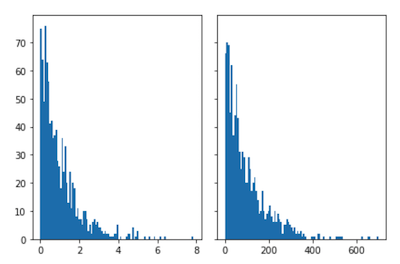

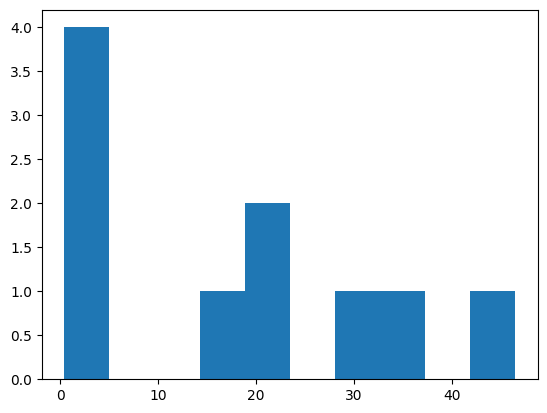

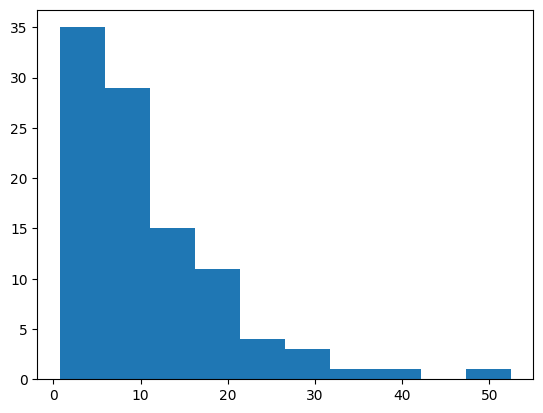

In [66]:
exponential = np.random.exponential(10,10)

plt.hist(x=exponential)
plt.show()

exponential = np.random.exponential(10,100)

plt.hist(x=exponential)
plt.show()

¿En qué se diferencian ambas distribuciones?

Graph 2 will show a better representation of exponential distribution given that it has more data.

## Distribución Exponencial de datos reales

Supongamos que el tiempo que uno pasa en un banco se distribuye exponencialmente con media de 10 minutos (es decir, λ = 1/10). ¿Cuál es la probabilidad de que un cliente pase menos de quince minutos en el banco? 

Escribe un código en python para resolver este problema

In [90]:
lambda_ = 1/10

Prob_less_15 = 1 - np.exp(-15/10)
print(Prob_less_15)

0.7768698398515702


¿Cuál es la probabilidad de que el cliente pase más de 15 minutos?

In [91]:
Prob_more_15 = np.exp(-15/10)

print(Prob_more_15)

0.22313016014842982
